## <span style=color:red>Ejercicio Practico -- Scatter Plots</span>

Let's first explore the dataset movies.dat

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#First, read the dataset
movies = pd.read_csv('movies.dat', sep = '::', encoding = 'latin1', header = None, engine = 'python')
movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Let's store the title and the year in separate columns using regex

In [3]:
#rename column 0 and 2 for a more easy to read code
movies.rename(columns = {0 : 'id', 2 : 'genres'}, inplace = True) #Change the labels of some columns

#Using column 1, use the extract method from pandas.
auxDf = movies[1].str.extract(r'(?P<Title>.+\s)(?P<Year>\(\d{4}\))')
#extract gets the capture group names (regex statements between '()'), and stores them in columns
#'?P<>' sets the title of the column
#.+ is for any character with appearance 1 or more, including blank space
#\s is for space
#.+\s is for any String that ends with a blank space.
#Since the titles of the movies are followed by a blank space but the year is not, extract captures only the title,
#but not the year
#\d is for any digit and {} states the exact number of repetitions.

auxDf['Title'] = auxDf['Title'].str.strip() #Gets rid of blank spaces at the end and start of string

#in the year we have braces, so let's replace them with an empty string
auxDf['Year'] = auxDf['Year'].str.replace(r'\D', '')
#\D is for any character other than digits. In this case, the method replace will change any 
#non-digit with an empty string.

movies[['Title', 'Year']] = auxDf[['Title', 'Year']]

movies.drop(1, axis = 1, inplace = True)
movies

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.


,id,genres,Title,Year
0,1,Animation|Children's|Comedy,Toy Story,1995
1,2,Adventure|Children's|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995
...,...,...,...,...
3878,3948,Comedy,Meet the Parents,2000
3879,3949,Drama,Requiem for a Dream,2000
3880,3950,Drama,Tigerland,2000
3881,3951,Drama,Two Family House,2000


In [4]:
#Chunck of code inspired in github ITAcademy DataScience Morning. A set in python won't hold any duplicate.
#https://github.com/IT-Academy-BCN/Data-Science-Morning/blob/main/Sprint%204/S4_T6A_exercici3.ipynb

genresSet = set()
#Put all the different genres in a set
for item in movies['genres']:
    for w in item.split('|'):
        genresSet.add(w)

genresList = list(genresSet)
#iterate the series movies['genres'] once for each unique genre detected. Check if the 'genres' value contains
#our iteration variable (genre)
for genre in genresList:
    movieGenre = movies['genres']
    movies[genre] = movieGenre.str.contains(genre).astype(int)
movies

,id,genres,Title,Year,Documentary,Mystery,Thriller,Sci-Fi,Musical,Adventure,...,Fantasy,Animation,Crime,Action,Comedy,Romance,Children's,Horror,Film-Noir,War
0,1,Animation|Children's|Comedy,Toy Story,1995,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,2,Adventure|Children's|Fantasy,Jumanji,1995,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,3,Comedy|Romance,Grumpier Old Men,1995,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,4,Comedy|Drama,Waiting to Exhale,1995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,Comedy,Father of the Bride Part II,1995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Comedy,Meet the Parents,2000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3879,3949,Drama,Requiem for a Dream,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Drama,Tigerland,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Drama,Two Family House,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ok, it is done. Some basic info about our cleaned dataset

In [5]:
movies.shape

(3883, 22)

In [6]:
movies.ndim

2

In [7]:
movies.columns

Index(['id', 'genres', 'Title', 'Year', 'Documentary', 'Mystery', 'Thriller',
       'Sci-Fi', 'Musical', 'Adventure', 'Drama', 'Western', 'Fantasy',
       'Animation', 'Crime', 'Action', 'Comedy', 'Romance', 'Children's',
       'Horror', 'Film-Noir', 'War'],
      dtype='object')

In [8]:
movies.dtypes

id              int64
genres         object
Title          object
Year           object
Documentary     int32
Mystery         int32
Thriller        int32
Sci-Fi          int32
Musical         int32
Adventure       int32
Drama           int32
Western         int32
Fantasy         int32
Animation       int32
Crime           int32
Action          int32
Comedy          int32
Romance         int32
Children's      int32
Horror          int32
Film-Noir       int32
War             int32
dtype: object

```python
movies['Year'] = movies['Year'].astype('int32')
movies['Title'] = movies['Title'].astype('str')
movies.head()
```

This code throws thw following error:
```python
ValueError: cannot convert float NaN to integer
```
Which means some movies don't have year. With a little bit of luck we will be able to get rid of those movies,
but to do that, the movie also needs to have no title. Let us check

In [9]:
print(movies['Year'].isna().sum())
print(movies['Title'].isna().sum())

1
1


So far so good. NaN has the same number of occurrences in both 'Title' and 'Year' columns. But do these isntances
belong to the same movie?

In [10]:
#Create an index object, containing the rows of the dataset
index = movies.index
#create the conditions that give problems
conditionTitle = movies['Title'].isna() #isna() returns a boolean
conditionYear = movies['Year'].isna()

problemTitle = list(index[conditionTitle])
print(problemTitle)

problemYear = list(index[conditionYear])
print(problemYear)

[988]
[988]


They appear to belong to the same movie, so we can rightfully drop the 988th row

In [11]:
movies.drop(988, inplace = True)

In [12]:
print(movies['Title'].isna().sum())
print(movies['Year'].isna().sum())

0
0


Let's continue

In [13]:
movies['Year'] = movies['Year'].astype('int32')
movies['Title'] = movies['Title'].astype('string')
movies['genres'] = movies['genres'].astype('string')
movies.dtypes

id              int64
genres         string
Title          string
Year            int32
Documentary     int32
Mystery         int32
Thriller        int32
Sci-Fi          int32
Musical         int32
Adventure       int32
Drama           int32
Western         int32
Fantasy         int32
Animation       int32
Crime           int32
Action          int32
Comedy          int32
Romance         int32
Children's      int32
Horror          int32
Film-Noir       int32
War             int32
dtype: object

In [14]:
movies.head()

,id,genres,Title,Year,Documentary,Mystery,Thriller,Sci-Fi,Musical,Adventure,...,Fantasy,Animation,Crime,Action,Comedy,Romance,Children's,Horror,Film-Noir,War
0,1,Animation|Children's|Comedy,Toy Story,1995,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,2,Adventure|Children's|Fantasy,Jumanji,1995,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,3,Comedy|Romance,Grumpier Old Men,1995,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,4,Comedy|Drama,Waiting to Exhale,1995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,Comedy,Father of the Bride Part II,1995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
def loliChart(data, ax, title):
    
    x = data['Year'].unique()
    y = []
    for year in x:
        movieYear = data[data['Year'] == year]
        y.append(movieYear.shape[0])
    
    ax.stem(x,y, linefmt = '--')
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of movies')
    ax.grid(b = True)

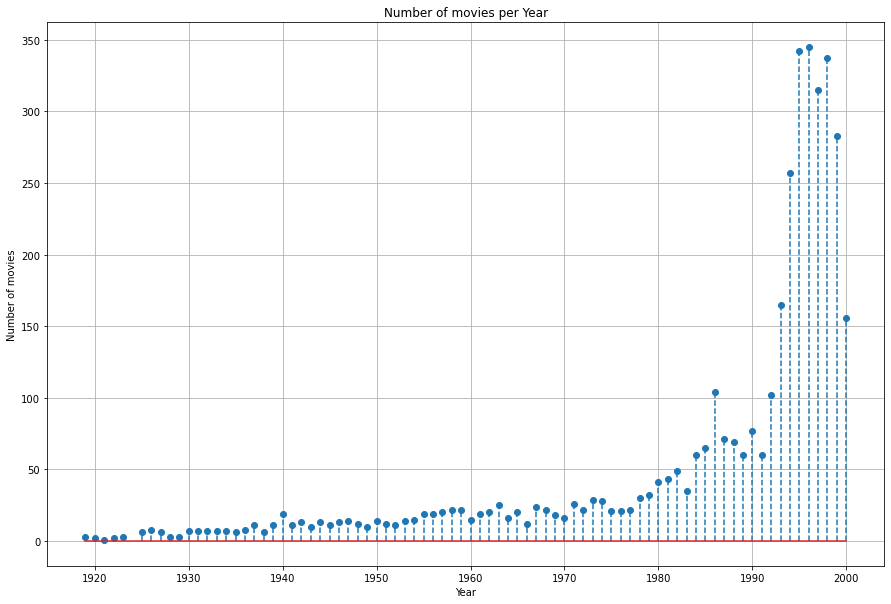

In [16]:
fig, ax = plt.subplots(figsize = (15,10))

loliChart(movies, ax, 'Number of movies per Year')

The plot above shows the number of movies released every year until 2000.

In [17]:
movies.columns

Index(['id', 'genres', 'Title', 'Year', 'Documentary', 'Mystery', 'Thriller',
       'Sci-Fi', 'Musical', 'Adventure', 'Drama', 'Western', 'Fantasy',
       'Animation', 'Crime', 'Action', 'Comedy', 'Romance', 'Children's',
       'Horror', 'Film-Noir', 'War'],
      dtype='object')

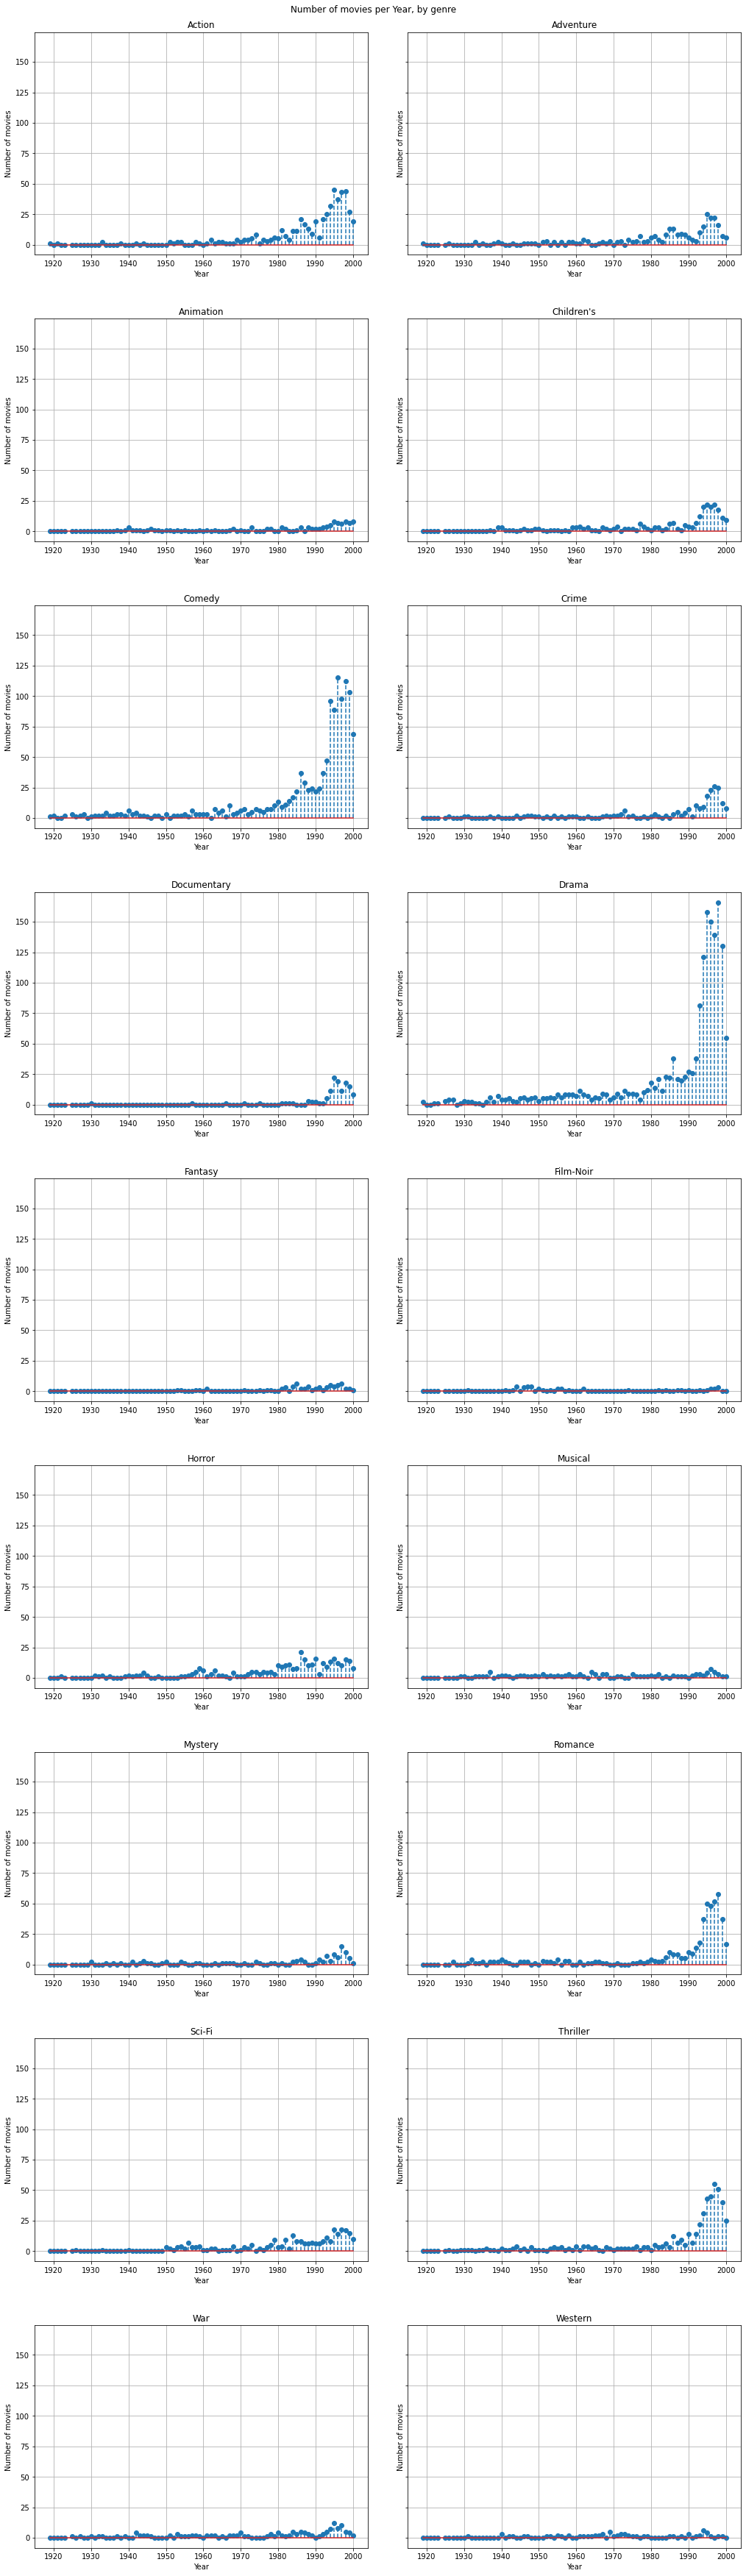

In [18]:
listOfGenres = list(movies.columns.difference(['id', 'genres', 'Title', 'Year']))
fig, axs = plt.subplots(nrows = len(listOfGenres)//2, ncols = 2, figsize = (15,50), sharey = True)

flatAxs = axs.flatten()

for i in range( len(flatAxs)):
    
    data = movies[movies[listOfGenres[i]] == 1]
    x = movies['Year'].unique()
    y = []
    for year in x:
        movieYear = data[data['Year'] == year]
        y.append(movieYear.shape[0])
    
    flatAxs[i].stem(x,y, linefmt = '--')
    flatAxs[i].set_title(listOfGenres[i])
    flatAxs[i].set_xlabel('Year')
    flatAxs[i].set_ylabel('Number of movies')
    flatAxs[i].grid(b = True)

fig.suptitle('Number of movies per Year, by genre')
fig.tight_layout(pad = 4)

To make boxplots we can count the number of movies per year, then divide by genre.

In [19]:
#groupby Year, and sum the columns
numMDS = movies.groupby('Year').sum().reset_index()
#Create a sorted list of the unique values of year of movies
years = sorted(movies['Year'].unique())
total = []
#Fill a list with the number of rows in each slice of movies by year
for year in years:
    total.append(movies[movies['Year'] == year].shape[0])

numMDS['Total'] = total

numMDS

,Year,id,Documentary,Mystery,Thriller,Sci-Fi,Musical,Adventure,Drama,Western,...,Animation,Crime,Action,Comedy,Romance,Children's,Horror,Film-Noir,War,Total
0,1919,8776,0,0,0,0,0,1,2,0,...,0,0,1,1,0,0,0,0,0,3
1,1920,6540,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,2
2,1921,3310,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1922,4543,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
4,1923,9011,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1996,372088,19,6,45,14,7,22,150,1,...,7,23,37,115,48,20,12,2,8,345
77,1997,564155,11,15,55,18,5,22,139,0,...,6,26,43,98,52,22,10,2,10,315
78,1998,777010,18,10,51,17,3,16,166,1,...,8,25,44,112,58,18,15,3,5,337
79,1999,842090,15,5,40,15,1,7,130,1,...,7,12,27,103,37,11,14,0,4,283


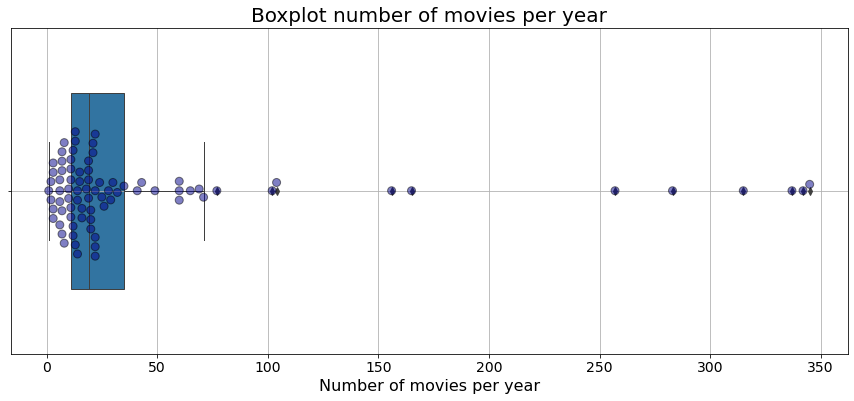

In [20]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(data = numMDS, x = 'Total', orient = 'h',  
            fliersize=5, linewidth=1 , width=0.6, ax = ax)
sns.swarmplot(data = numMDS, x = 'Total', orient = 'h',
             color = 'darkblue', alpha = 0.5, size = 8, linewidth=1, edgecolor = 'black', ax = ax) 

ax.set_xlabel('Number of movies per year')
ax.set_title('Boxplot number of movies per year', size = 20)
ax.tick_params(labelsize = 14)
ax.set_xlabel(ax.get_xlabel(), fontsize = 16)
ax.grid(b = True)


<span style=color:blue><font size=4><b><u>Dos Variables</u></b>: 1 Categórica = 'genre', 1 Numérica = 'number of movies'</font></span>

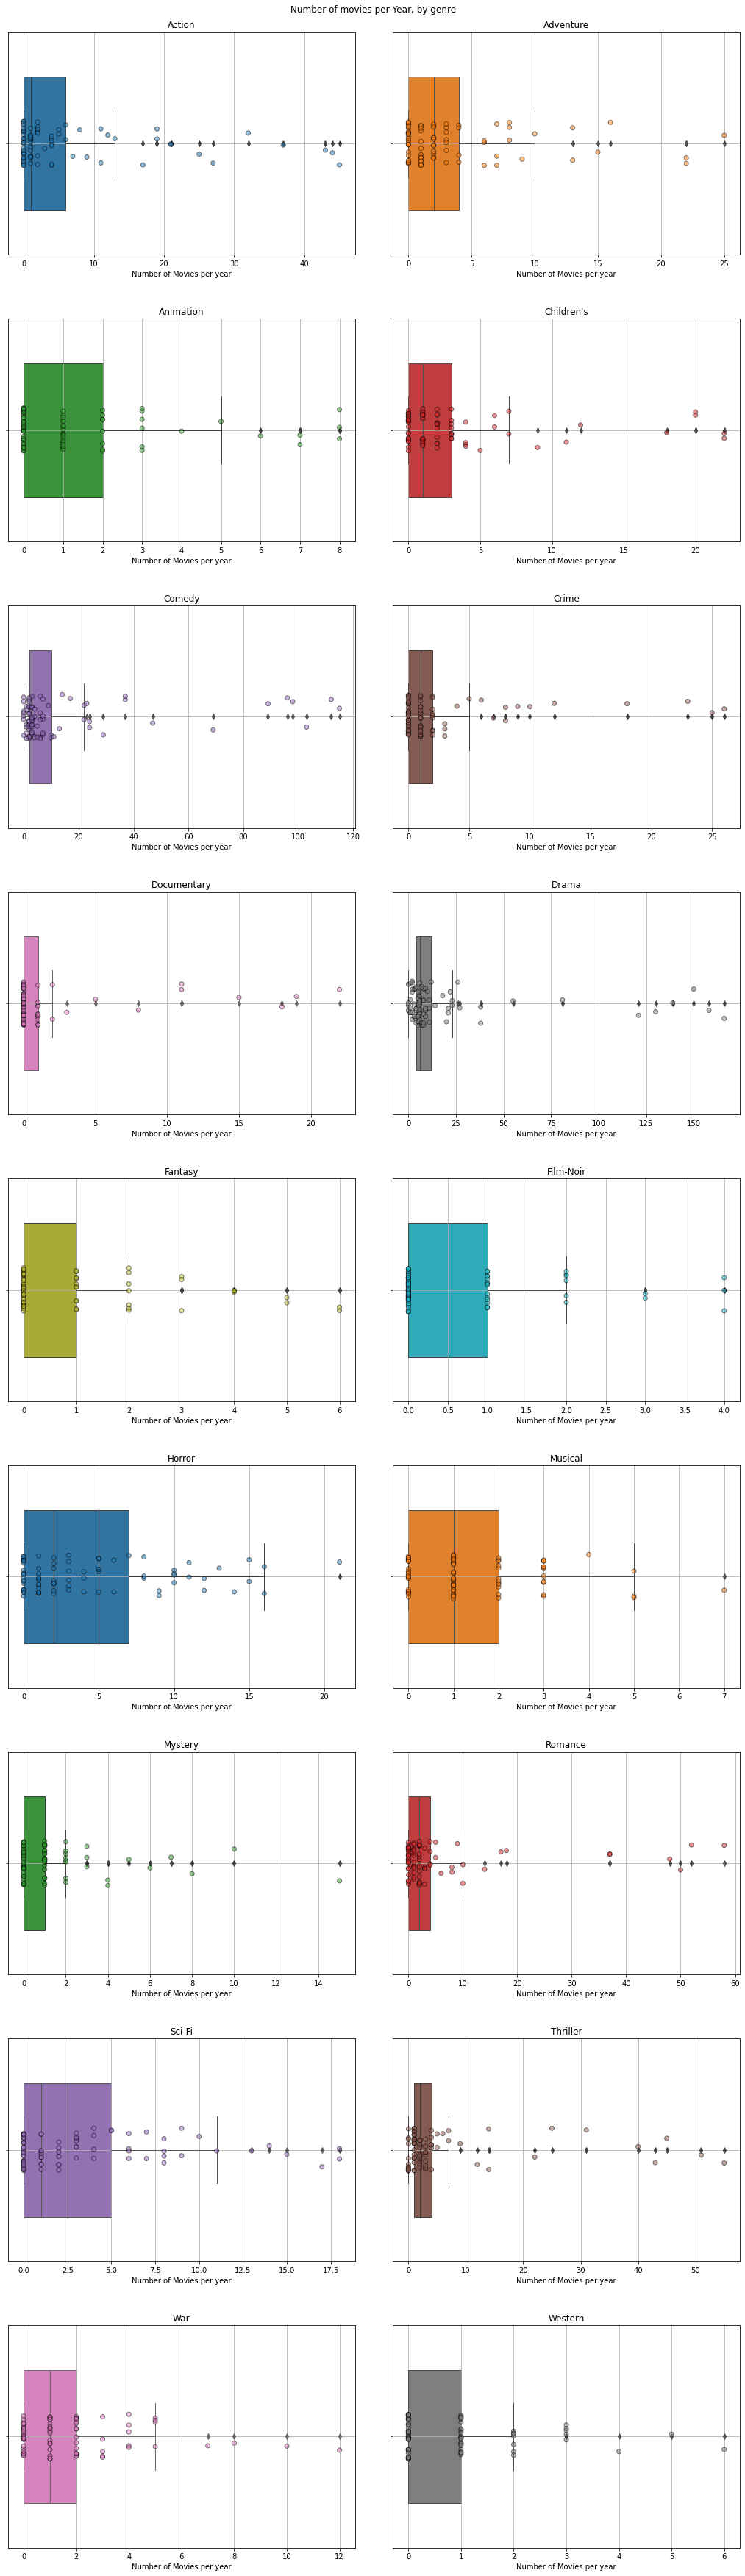

In [21]:
#Create a list of all the genres
listOfGenres = numMDS.columns.difference(['id','Year','Total'])
#Create a colormap. To avoid indexing out of bounds, we concatenate two lists containing the same colors.
cmap = plt.get_cmap('tab10')
colorList = list(cmap.colors) + list(cmap.colors)
#Start the plotting
fig, axs = plt.subplots(nrows = len(listOfGenres)//2, ncols = 2, figsize = (15,50), sharex = False)

flatAxs = axs.flatten()

for i in range(len(flatAxs)):
    #This is the object we want to plot
    series= numMDS[listOfGenres[i]]
    
    sns.boxplot(x = series, orient = 'h',  color = colorList[i],
            fliersize=5, linewidth=1 , width=0.6, ax = flatAxs[i])
    
    sns.stripplot(x = series, orient = 'h', color = colorList[i],
             alpha = 0.5, size = 6, linewidth=1, edgecolor = 'black', ax = flatAxs[i] ) 
    flatAxs[i].set_title(listOfGenres[i])
    flatAxs[i].set_xlabel('Number of Movies per year')
    flatAxs[i].grid(b = True)

fig.suptitle('Number of movies per Year, by genre')
fig.tight_layout(pad = 4)

sharex = False for a better visualization of each genre.

## <span style=color:blue>Facet Grids y Categorical DataFrame</span>

Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional. 

Usando el método <span style=color:darkred><b>factorplot( )</b></span> de <span style=color:darkred>"Facet Grid"</span> :

<span style=color:blue><font size=4><b><u>Cuatro Variables</u></b> : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'</font></span>

To better explore the dataset, we perform a correlation analysis

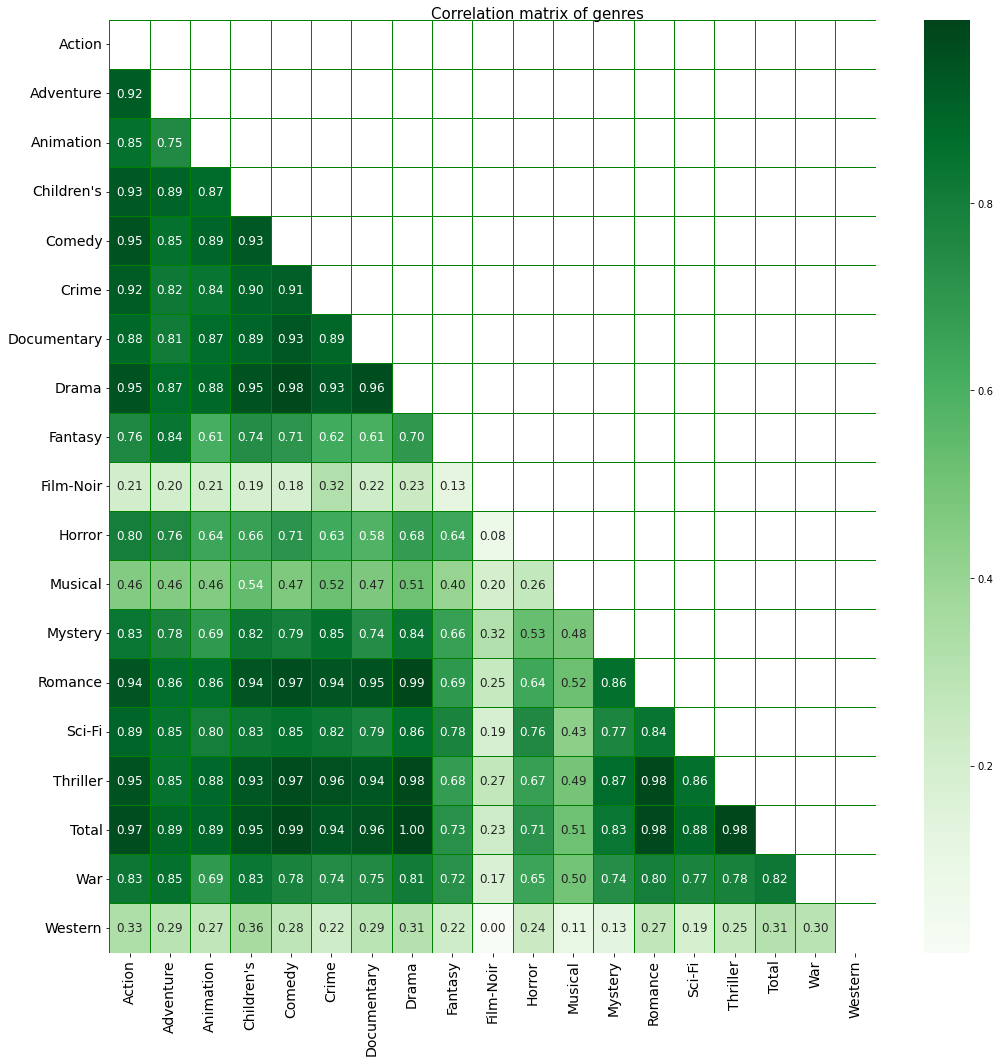

In [22]:

corrMat = numMDS[numMDS.columns.difference(['id', 'Year'])].corr()

#Create a mask. Where true or != 0, it will mask the results
mask = np.triu(corrMat)

fig, ax = plt.subplots(figsize = (15,15))
#Pass the parameter mask to the heatmap function
cr = sns.heatmap(corrMat, annot = True, linewidths = 0.5, mask = mask,
            linecolor = 'green', annot_kws={"size": 12}, cmap = 'Greens',  fmt = '.2f', ax = ax)

cr.axes.tick_params(labelsize = 14)
#We can use either cr or axes, since sns.heatmap is a function returning an ax object
fig.suptitle('Correlation matrix of genres', size = 15)
fig.tight_layout(pad = 1)

The heatmap shows that drama and comedy have strong correlation coeficients with many other genres, so let us plot 
a scatterplot.

In [23]:
#Put all the columns as values for a column variable. We are getting 81 rows*3 genres (romance, Comedy and Thriller)
numMDSMelt = numMDS[['Year', 'Drama', 'Thriller', 'Romance', 'Comedy']].melt(id_vars = ['Year', 'Drama'])
numMDSMelt

,Year,Drama,variable,value
0,1919,2,Thriller,0
1,1920,0,Thriller,0
2,1921,0,Thriller,0
3,1922,1,Thriller,0
4,1923,1,Thriller,0
...,...,...,...,...
238,1996,150,Comedy,115
239,1997,139,Comedy,98
240,1998,166,Comedy,112
241,1999,130,Comedy,103


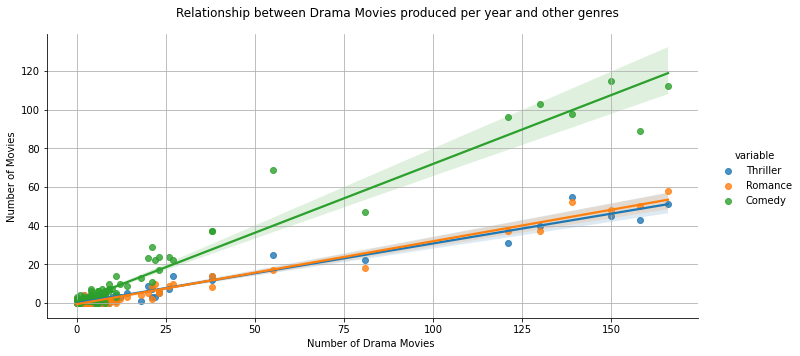

In [24]:
sct = sns.lmplot(data = numMDSMelt, x = 'Drama', y = 'value', hue = 'variable',
                 height = 5, aspect = 2)
sct.ax.grid(b = True)
sct.ax.set_xlabel('Number of Drama Movies ')
sct.ax.set_ylabel('Number of Movies')
sct.fig.suptitle('Relationship between Drama Movies produced per year and other genres')
sct.tight_layout()
#sns.regplot(data = numMDSMelt, x = 'Drama', y = 'value', hue = 'variable', ax = sct.ax)

This visualization clearly shows that the number of produced drama movies is dependent on how many Thriller, Comedy or Romance movies are produced in a particular year. However, it also takes into account movies that share genre, as in a Drama-Comedy movie for example. So it is proven there is a dependency, but it is impossible (only taking into account this visualization) to understand the origin of this dependency. It may be that drama movies are prone to share genre with other movies, or that behind production there is an agenda that limits the number of movies released for each genre. What's more, it could be none of the above. We could prove or negate the first hypothesis by comparing this plot with a similar plot, but only taking into account the movies that don't share their genre with drama.

In [25]:
movies
dramaMovies = movies[movies['genres'].str.contains('Drama')] 
dramaYear = dramaMovies.groupby('Year').sum()

romanceMovies = movies[
                (movies['genres'].str.contains('Romance')) & ~(movies['genres'].str.contains('Drama'))] #romnce without drama
romanceYear = romanceMovies.groupby('Year').sum()

thrillerMovies = movies[
                (movies['genres'].str.contains('Thriller')) & ~(movies['genres'].str.contains('Drama'))]
thrillerYear = thrillerMovies.groupby('Year').sum()

comedyMovies = movies[
                (movies['genres'].str.contains('Comedy')) & ~(movies['genres'].str.contains('Drama'))]
comedyYear = comedyMovies.groupby('Year').sum()

plottingDs = pd.concat([dramaYear['Drama'], romanceYear['Romance'], thrillerYear['Thriller'], comedyYear['Comedy']], axis = 1)
plottingDs

,Drama,Romance,Thriller,Comedy
Year,,,,
1919,2.0,NaN,NaN,1.0
1920,NaN,NaN,NaN,2.0
1922,1.0,NaN,NaN,NaN
1923,1.0,NaN,NaN,2.0
1925,3.0,NaN,NaN,3.0
...,...,...,...,...
1996,150.0,28.0,28.0,96.0
1997,139.0,32.0,45.0,77.0
1998,166.0,28.0,41.0,85.0


It is safe to assume NaN values as 0

In [26]:
plottingDs.fillna(0, inplace = True)
plottingDs

,Drama,Romance,Thriller,Comedy
Year,,,,
1919,2.0,0.0,0.0,1.0
1920,0.0,0.0,0.0,2.0
1922,1.0,0.0,0.0,0.0
1923,1.0,0.0,0.0,2.0
1925,3.0,0.0,0.0,3.0
...,...,...,...,...
1996,150.0,28.0,28.0,96.0
1997,139.0,32.0,45.0,77.0
1998,166.0,28.0,41.0,85.0


Let us melt to get a hue and then plot!

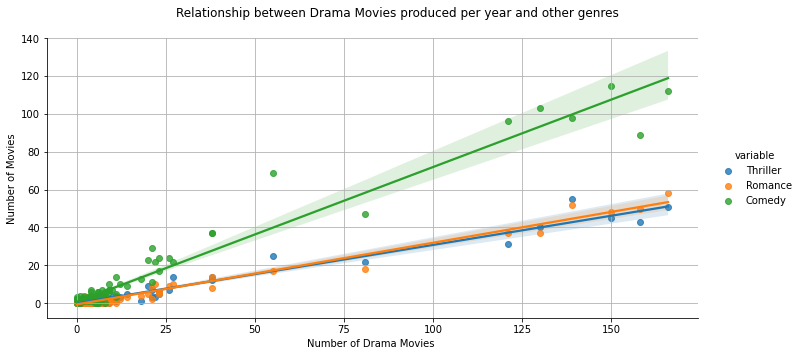

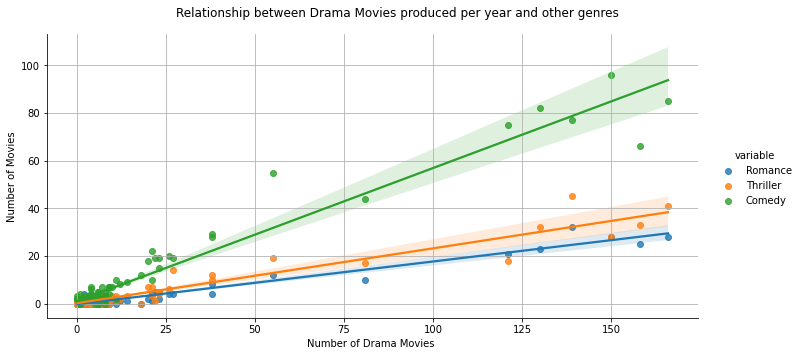

In [27]:
plotMelt = plottingDs.melt(id_vars = ['Drama'])


scta = sns.lmplot(data = numMDSMelt, x = 'Drama', y = 'value', hue = 'variable',
                 height = 5, aspect = 2)
scta.ax.grid(b = True)
scta.ax.set_xlabel('Number of Drama Movies ')
scta.ax.set_ylabel('Number of Movies')
scta.fig.suptitle('Relationship between Drama Movies produced per year and other genres')
scta.tight_layout()

sctb = sns.lmplot(data = plotMelt, x = 'Drama', y = 'value', hue = 'variable',
                height = 5, aspect = 2)                 
sctb.ax.grid(b = True)
sctb.ax.set_xlabel('Number of Drama Movies ')
sctb.ax.set_ylabel('Number of Movies')
sctb.fig.suptitle('Relationship between Drama Movies produced per year and other genres')
sctb.tight_layout()

Final thoughts: This dataset is a tricky one to analyse and extract some knowledge out of it. It seems that the relationship between drama and thriller, Romance and comedy, does not strongly depends on the movies sharing drama with one of the other genres, but neither does it depend strongly on "external" causes. It is a combination of factors. This can be clearly seen all of the regressions, where the lines changed their tendency (namely their slope decreased), but are still pretty good regressions. Let us take a look at the correlogram:

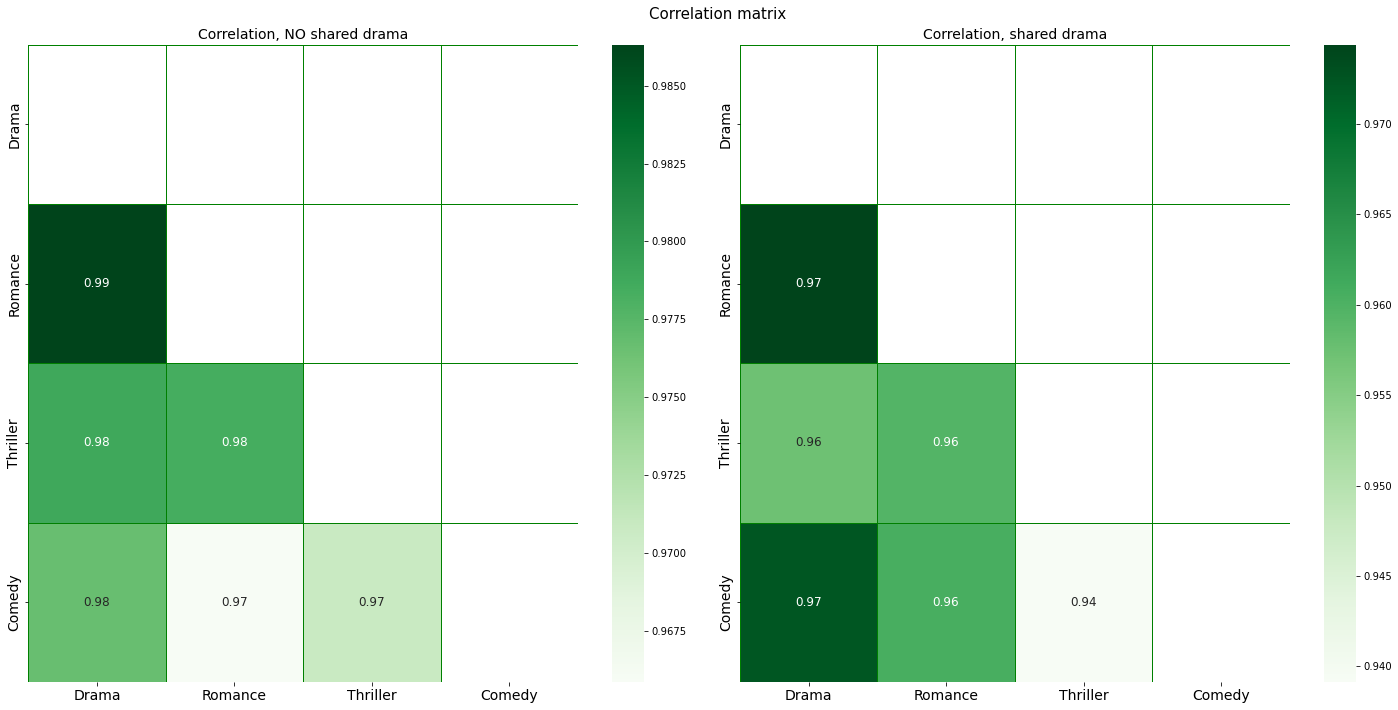

In [28]:
corrMat1 = numMDS[['Drama', 'Romance', 'Thriller', 'Comedy']].corr()
corrMat2 = plottingDs.corr()
#Create a mask. Where true or != 0, it will mask the results
mask1 = np.triu(corrMat1)
mask2 = np.triu(corrMat2)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
#Pass the parameter mask to the heatmap function
flatAxs = axs.flatten()

sns.heatmap(corrMat1, annot = True, linewidths = 0.5, mask = mask1,
            linecolor = 'green', annot_kws={"size": 12}, cmap = 'Greens',  fmt = '.2f', ax = flatAxs[0])

flatAxs[0].tick_params(labelsize = 14)
flatAxs[0].set_title('Correlation, NO shared drama', size = 14)

sns.heatmap(corrMat2, annot = True, linewidths = 0.5, mask = mask2,
            linecolor = 'green', annot_kws={"size": 12}, cmap = 'Greens',  fmt = '.2f', ax = flatAxs[1])

flatAxs[1].tick_params(labelsize = 14)
flatAxs[1].set_title('Correlation, shared drama', size = 14)

fig.suptitle('Correlation matrix', size = 15)
fig.tight_layout(pad = 1)

It is clear that the correlation is a little bit weaker, but the coefficient is still standing strong. The conclusion is that the number of comedies, thrillers, and romances produced, has a strong relationship with the number of dramas produced (all in a given year). It is important to highlight that the chosen genres are ones with a high appearance rate in the distribution, so there can be 2 explanations:
- **The number of drama movies somehow controls the rest of the movies, and viceversa:** This would mean that there is some kind of strategy when producing movies, so that it fits a certain pattern.
- **There is a random, weighted distribution of movie genres:** This distribution would only apply to certain genres. For example Film-Noir would be excluded.  

Any of these two statements should be further pursued if a deep analysis is a thing we want.